In [233]:
##project 2. eigenfaces.
import scipy.misc as msc
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
import os
from pylab import imshow
from scipy.spatial import distance as dist

In [204]:
files = os.listdir('train')
trainNames = random.sample(files, int(len(files)*0.9))
X = np.stack([msc.imread('train/' + f).flatten() for f in trainNames], axis=0)
test_names = [name for name in files if name not in trainNames]
X_test = np.stack([msc.imread('train/' + f).flatten() for f in test_names], axis=0)
meanTrain = np.mean(X, axis=0)
mean_test = np.mean(X_test, axis=0)

In [296]:
def pca(X, X_test, meanTrain, mean_test):
    obs,dim = X.shape
    Xnorm = (X - meanTrain).T  # subtract the mean (along columns)
    C = np.dot(Xnorm,Xnorm.T)/obs
    values, vectors = np.linalg.eigh(C)
    idx = np.argsort(values)[::-1]
    

    Xnorm = Xnorm[idx]
    values = values[idx]    # sorting eigenvalues
    vectors = vectors[idx]  # sorting eigenvectors
    
    plt.plot(values)
    plt.show()
    
    #define only largest eigen values
    valuesBig, = np.where((np.cumsum(values) / np.sum(values)) < 0.9)
    vectorsBig = vectors[:len(valuesBig)]
    for index,vector in enumerate(vectorsBig):
        plt.figure()
        the_vector = np.reshape(vector, (19, 19))
        plt.imshow(the_vector, 'gray')
        plt.title(values[index])
    
    X_test_norm = (X_test - mean_test)
    
    test_images = random.sample(X_test_norm, 10)
    
    print values[360]
    d = []
    for test in test_images:
        arr = []
        for train in Xnorm.T:
            arr.append(dist.euclidean(test, train))
        arr.sort()
        arr = arr[::-1]
        plt.figure()
        plt.plot(arr)
        d.append(arr)
        
    plt.show()
        
    # d = dist.euclidean(X_test_norm, X)
    # dist.append(np.linalg.norm(X_test_norm - X, 'euc', axis=1))
    
    
    
    #eigen vector visualization
    #msc.imshow( np.reshape( vectors[2,:].real, (19,19)))
    # projection of the data in the new space
    proj = np.dot(vectors.T, Xnorm)
    # image reconstruction
    Xr = np.dot(vectors, proj).T + meanTrain
    #msc.imshow(Xr)

    # dist = []
    # difference in Frobenius norm
    #dist.append(np.linalg.norm(X - Xr, 'euc'))



In [297]:
im_show = np.reshape(meanTrain, (19, 19))
#plt.imshow(im_show, 'gray')

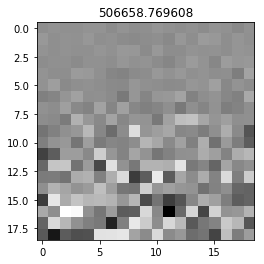

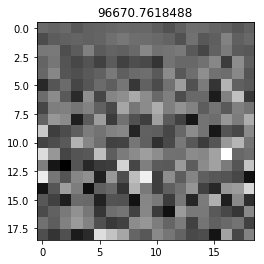

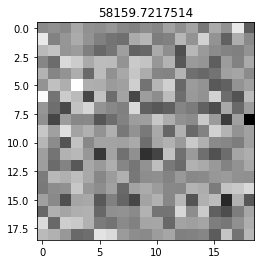

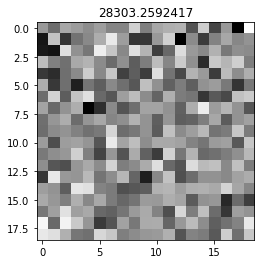

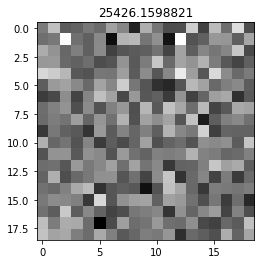

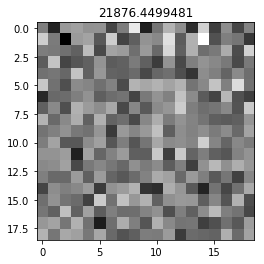

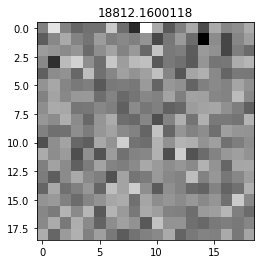

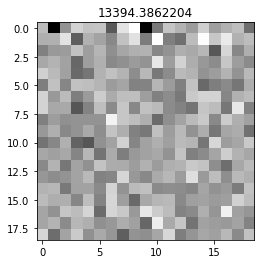

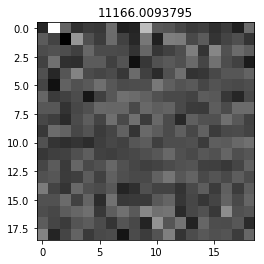

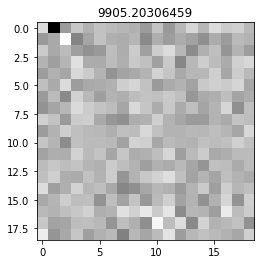

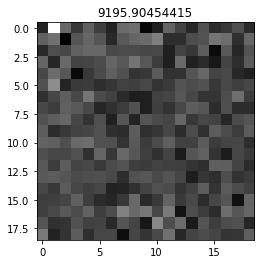

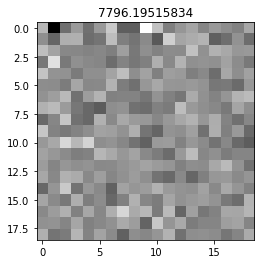

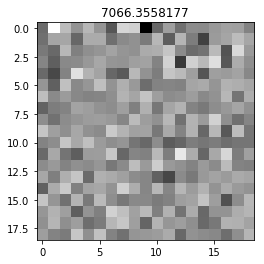

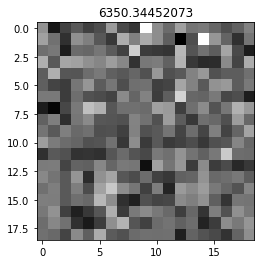

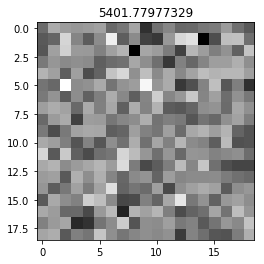

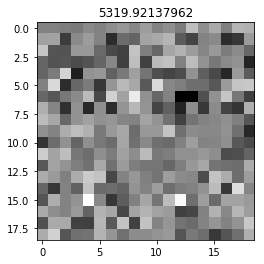

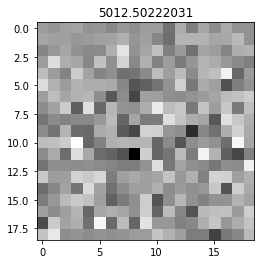

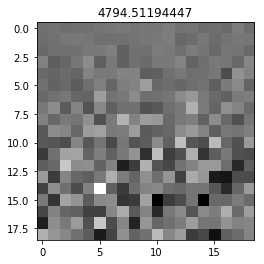

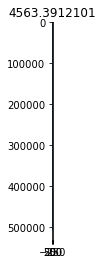

1.72411062803


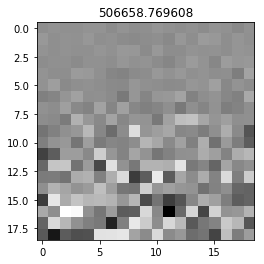

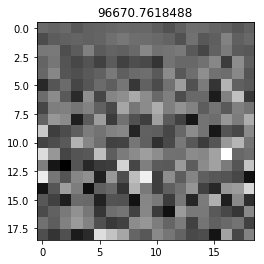

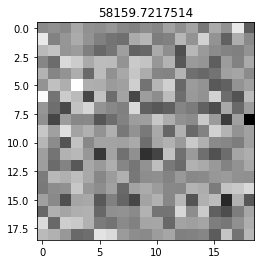

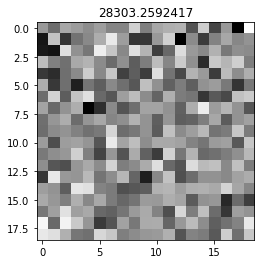

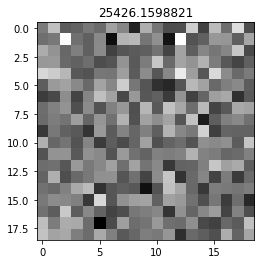

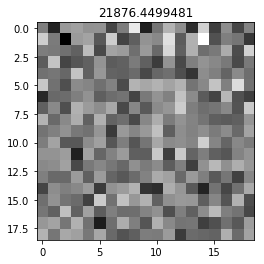

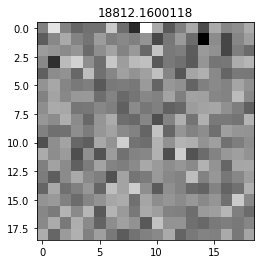

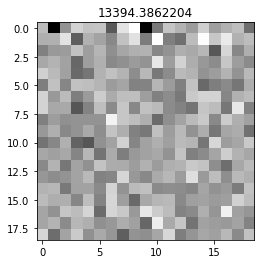

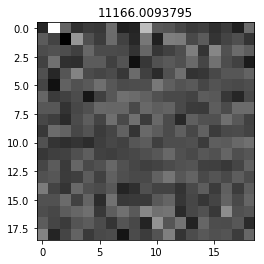

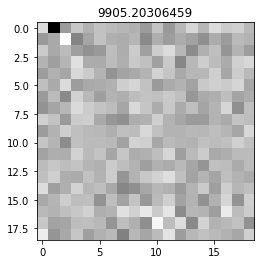

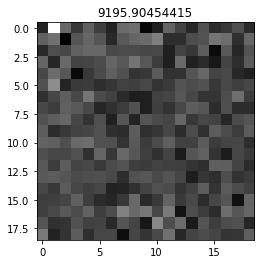

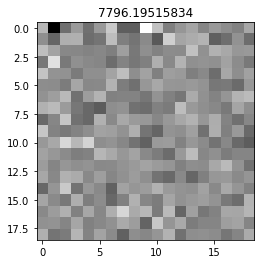

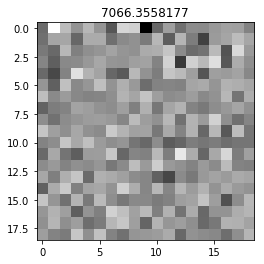

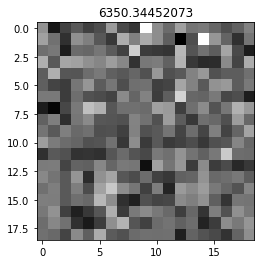

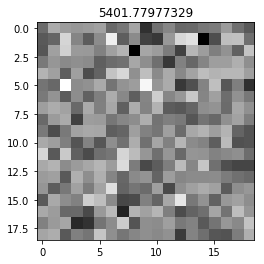

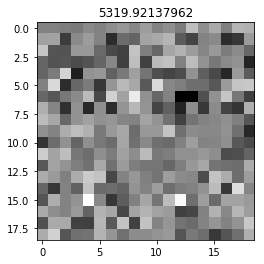

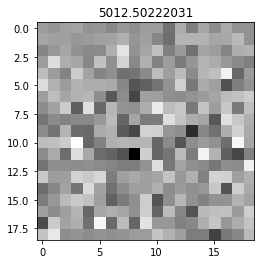

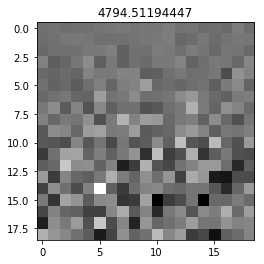

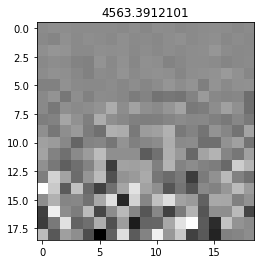

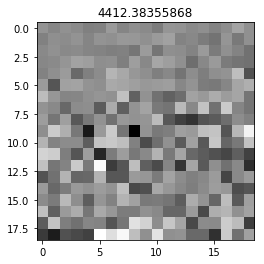

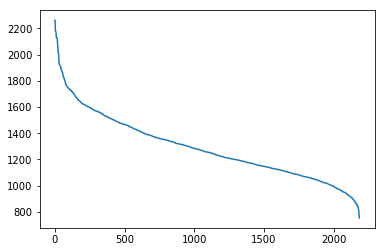

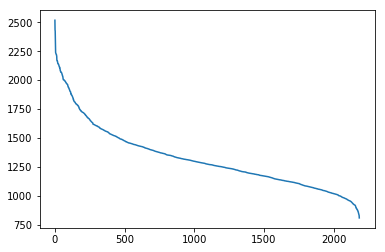

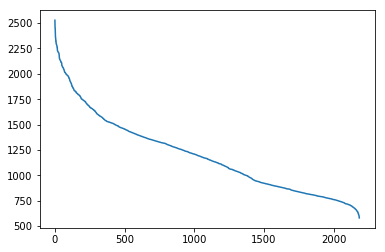

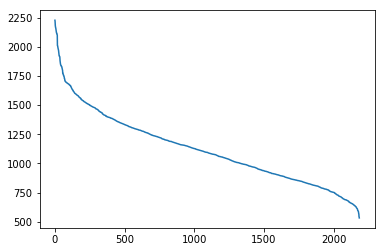

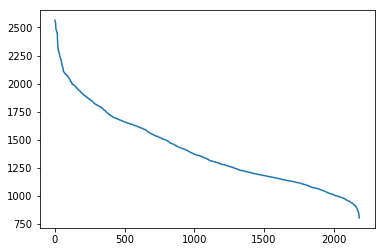

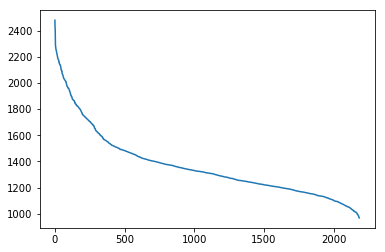

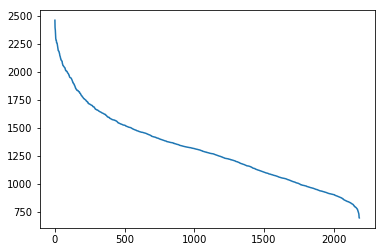

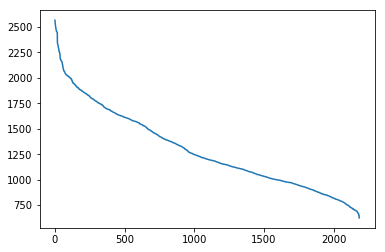

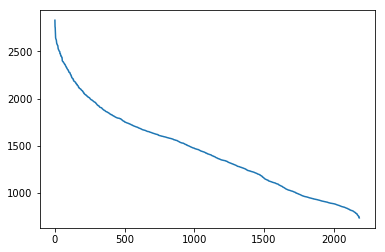

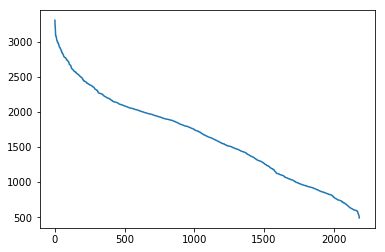

In [298]:
plt.close()
pca(X, X_test, meanTrain, mean_test)